In [13]:
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create Simple Custom Callback

In [14]:
class MyCallback(Callback):
    def on_train_begin(self, logs=None):
        print('starting training ...')

    def on_epoch_begin(self, epoch, logs=None):
        print(f'starting epoch {epoch}')

    def on_epoch_end(self, epoch, logs=None):
        print(f'ended epoch {epoch}')

    def on_train_end(self, logs=None):
        print('Your training has FINISHED!')

my_callback = MyCallback()

In [15]:
# getting the data
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

diabetes = load_diabetes()

data = diabetes['data']
targets = diabetes['target']
targets = (targets - targets.mean())/targets.std()

train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size=0.15)

In [16]:
model = Sequential([
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.fit(train_data, train_targets, validation_split=0.3, epochs=5, callbacks=[my_callback], batch_size=128, verbose=False)
model.summary()

starting training ...
starting epoch 0
ended epoch 0
starting epoch 1
ended epoch 1
starting epoch 2
ended epoch 2
starting epoch 3
ended epoch 3
starting epoch 4
ended epoch 4
Your training has FINISHED!
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 128)               1408      
_________________________________________________________________
batch_normalization_9 (Batch (None, 128)               512       
_________________________________________________________________
dense_16 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 129       
Total params: 18,561
Trainable params: 18,305
N

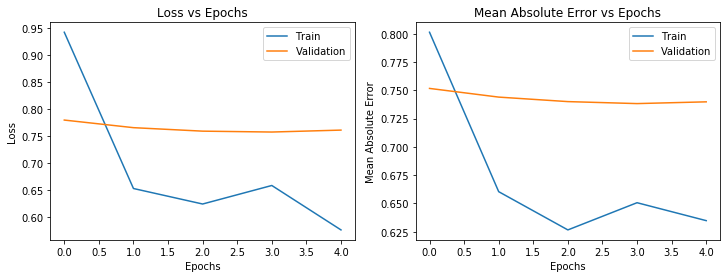

In [17]:
history = model.history.history

frame = pd.DataFrame(history)
epochs = np.arange(len(frame))

fig = plt.figure(figsize=(12,4))

# Loss plot
ax = fig.add_subplot(121)
ax.plot(epochs, frame['loss'], label="Train")
ax.plot(epochs, frame['val_loss'], label="Validation")
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.set_title("Loss vs Epochs")
ax.legend()

# Accuracy plot
ax = fig.add_subplot(122)
ax.plot(epochs, frame['mae'], label="Train")
ax.plot(epochs, frame['val_mae'], label="Validation")
ax.set_xlabel("Epochs")
ax.set_ylabel("Mean Absolute Error")
ax.set_title("Mean Absolute Error vs Epochs")
ax.legend()


In [18]:
model = Sequential([
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    BatchNormalization(),
    Dense(10, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.fit(train_data, train_targets, validation_split=0.5, epochs=5, callbacks=[my_callback], batch_size=128, verbose=False)
model.summary()

starting training ...
starting epoch 0
ended epoch 0
starting epoch 1
ended epoch 1
starting epoch 2
ended epoch 2
starting epoch 3
ended epoch 3
starting epoch 4
ended epoch 4
Your training has FINISHED!
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 128)               1408      
_________________________________________________________________
batch_normalization_10 (Batc (None, 128)               512       
_________________________________________________________________
dense_19 (Dense)             (None, 128)               16512     
_________________________________________________________________
batch_normalization_11 (Batc (None, 128)               512       
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_______________________________________________

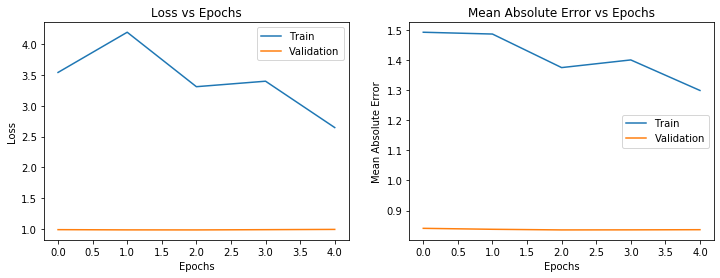

In [19]:
history = model.history.history

frame = pd.DataFrame(history)
epochs = np.arange(len(frame))

fig = plt.figure(figsize=(12,4))

# Loss plot
ax = fig.add_subplot(121)
ax.plot(epochs, frame['loss'], label="Train")
ax.plot(epochs, frame['val_loss'], label="Validation")
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.set_title("Loss vs Epochs")
ax.legend()

# Accuracy plot
ax = fig.add_subplot(122)
ax.plot(epochs, frame['mae'], label="Train")
ax.plot(epochs, frame['val_mae'], label="Validation")
ax.set_xlabel("Epochs")
ax.set_ylabel("Mean Absolute Error")
ax.set_title("Mean Absolute Error vs Epochs")
ax.legend()